**Transformer Model for Sequence-to-Sequence Tasks**
* Purpose: Constructs a transformer model using TensorFlow/Keras for sequence-to-sequence tasks such as machine translation.
* Components:
  * Inputs: Two input layers (encode_inp for encoder sequences and decode_inp for decoder sequences).
  * Positional Embeddings: Embeds input sequences with positional information using PositionalEmbedding layers.
  * Encoder Layers: Multiple encoder layers consisting of self-attention and feed-forward networks to process input sequences.
  * Decoder Layers: Multiple decoder layers incorporating self-attention, encoder-decoder attention, and feed-forward networks to generate output sequences.
  * Final Output Layer: Dense layer producing final output logits corresponding to the vocabulary size of the decoder (target language).
* Processing:
  * Sequentially processes encoder and decoder inputs through respective layers.
  * Integrates encoder outputs into decoder layers to capture context from input sequences during decoding.
  * Computes output logits for predicting target sequences.
* Enhancements:
  * Manages masking within attention mechanisms and outputs for efficient sequence processing.
  * Delivers a comprehensive transformer architecture suitable for various sequence-to-sequence tasks in natural language processing.

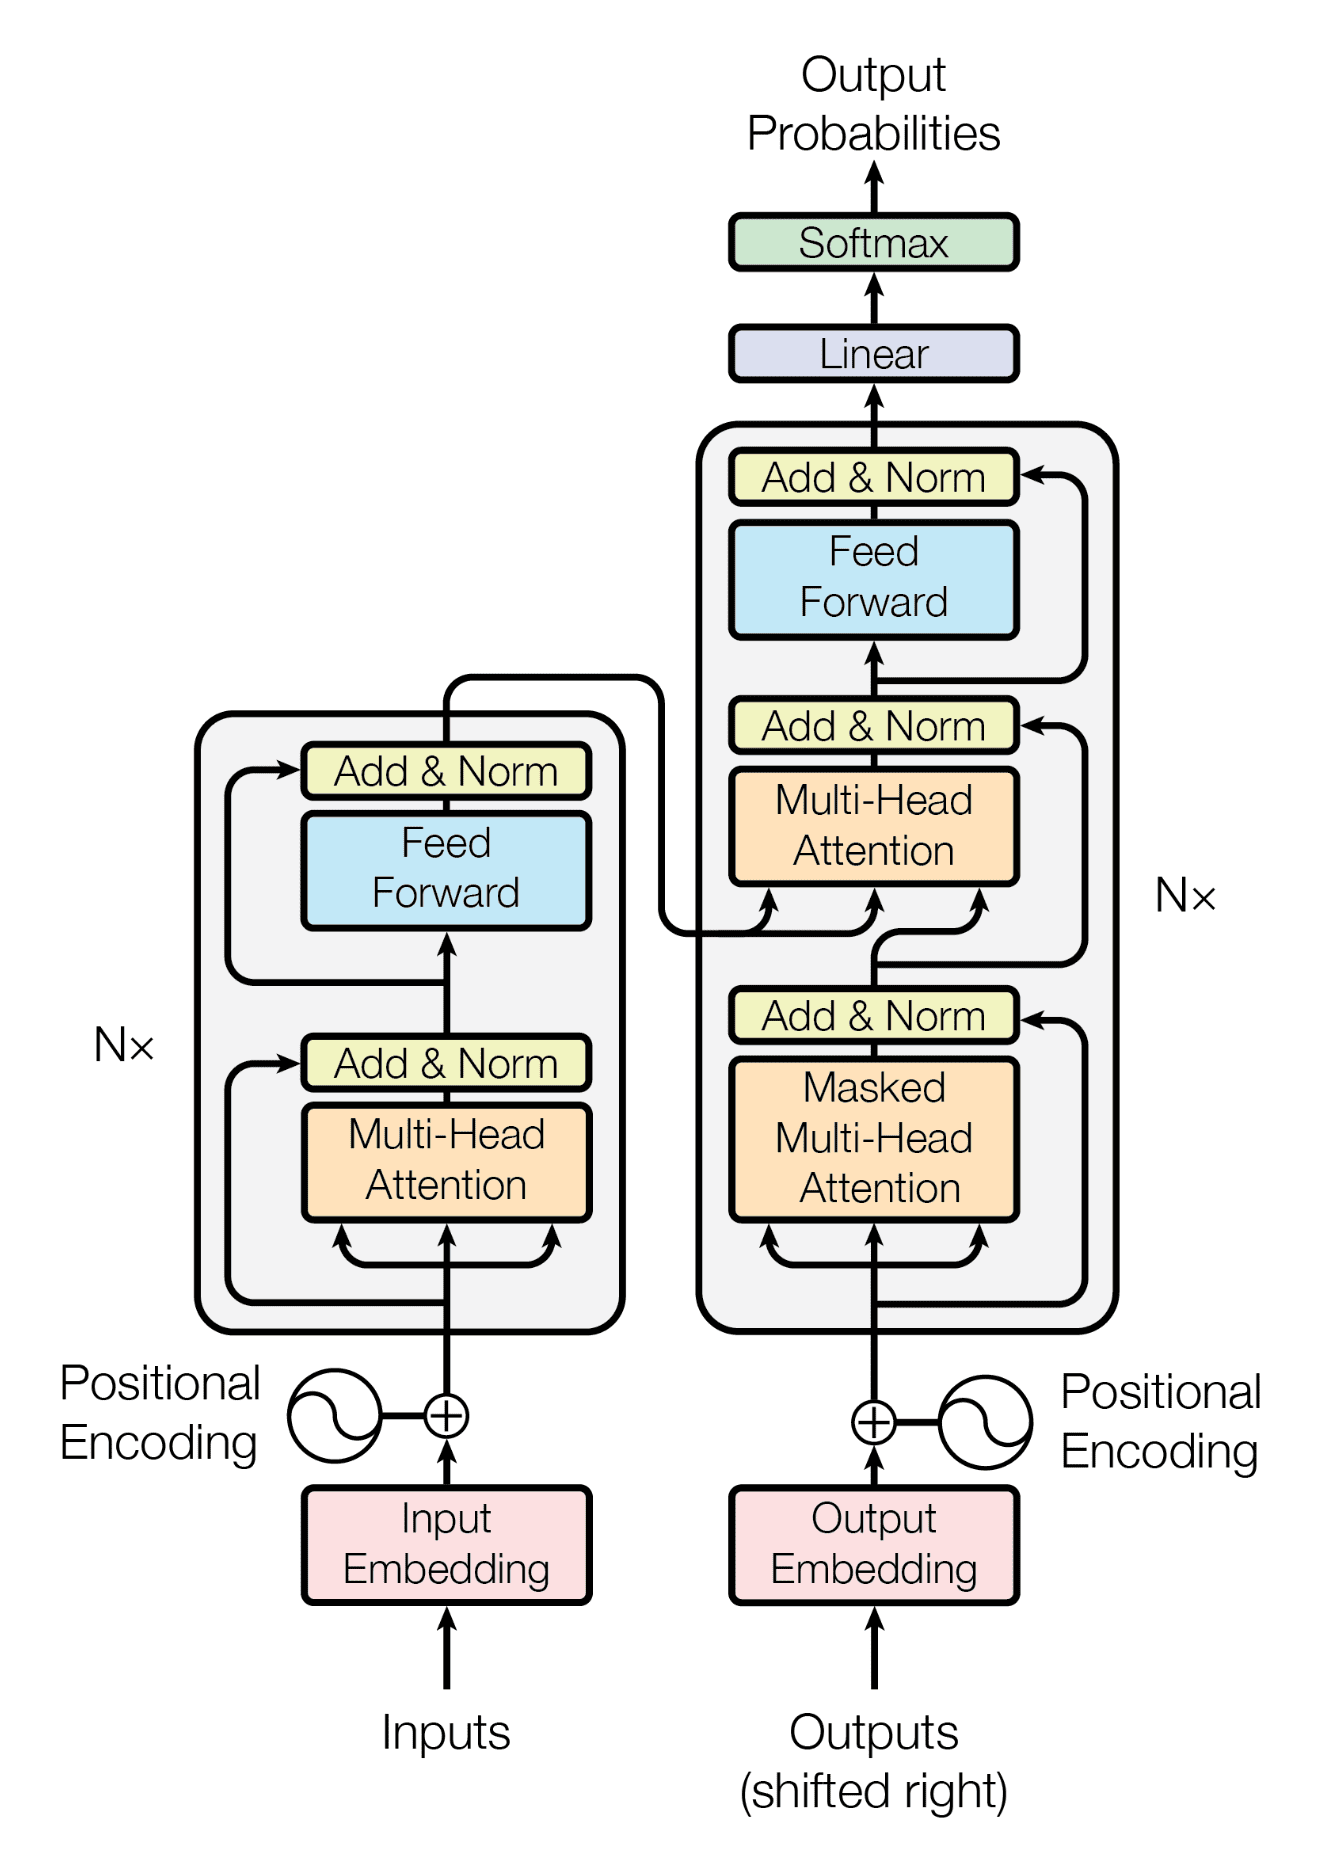

# Data Gathering


Downloading and Extracting a Text File using TensorFlow

*   Import TensorFlow.

*   Download File: fra-eng.zip from a specified URL.

*   Extract File: Extract contents after download.








In [1]:
import tensorflow as tf
text_file = tf.keras.utils.get_file(
    fname ='fra-eng.zip',
    origin = 'http://storage.googleapis.com/download.tensorflow.org/data/fra-eng.zip',
    extract = True,
)


3423204/3423204 [==============================] - 0s 0us/step




*   pathlib: A Python module for object-oriented filesystem paths management.

*   Define Path: Set path to the extracted fra.txt file using pathlib.








In [2]:
import pathlib
text_file = pathlib.Path(text_file).parent/'fra.txt'

In [3]:
print(text_file)

/root/.keras/datasets/fra.txt


In [4]:
with open(text_file) as fp:
    text_pair = [line for line in fp]

In [5]:
import random
for _ in range (10):
  print (random.choice(text_pair))

Help me move this stone.	Aide-moi à déplacer cette pierre.

I can't believe it's true.	Je n'arrive pas à croire que ce soit vrai.

I don't know how, but I did it.	J'ignore comment mais je l'ai fait.

Is Tom drunk?	Tom est-il saoul ?

What would you like for breakfast?	Qu'aimeriez-vous pour votre petit-déjeuner ?

The hail cracked the window.	La grêle a fendu la vitre.

What's your favorite hot weather food?	Quelle est ta nourriture préférée par temps chaud ?

He was raging mad.	Il était fou de rage.

Tom fainted as soon as he saw the needle.	Tom s'est évanoui dès qu'il a vu l'aiguille.

Don't do it.	Ne le fais pas !



Text Normalization Function
* Import Libraries: Import unicodedata and re
for normalization and regex operations.
* Define Function: normalize(line) function to process text.
* Unicode Normalization: Convert text to lowercase and normalize using NFKC form.
* Regex Substitution: Add spaces around non-word characters.
* Split Text: Split the line into English and French segments by tab.
* Add Tokens: Append [start] and [end] tokens to the French text.

In [6]:
import unicodedata
import re
def normalize(line):
  line = unicodedata.normalize("NFKC", line.strip().lower()) # Normalize the text
  line =  re.sub(r"^([^\w])(?!\s)", r" \1", line)
  line = re.sub(r"(?!\s)([^\w])$", r" \1", line)
  line = re.sub(r"(?!\s)([^\w])", r" \1", line)
  eng, fre = line.split('\t')
  fre = '[start]' + fre + '[end]'
  return eng, fre

In [7]:
with open(text_file) as fp:
  text_pairs = [normalize(line) for line in fp]

In [8]:
for _ in range (10):
  print(random.choice(text_pairs))

("what 's standing between us and that happening ?", "[start]qu 'est -ce qui s 'interpose entre nous et cet événement   ?[end]")
('he stopped reading the newspaper .', '[start]il a cessé de lire le journal  .[end]')
('i love animals .', "[start]j 'adore les animaux  .[end]")
('we took a long walk .', '[start]nous avons fait une longue promenade  .[end]')
('maybe we should try to change that law .', '[start]peut -être devrions -nous essayer de changer cette loi  .[end]')
('what do you do in your free time ?', '[start]que fais -tu pendant ton temps libre   ?[end]')
('tom could never make me laugh the way you do .', '[start]tom ne pourrait jamais me faire rire comme tu le fais  .[end]')
('will you show me your passport , please ?', "[start]voulez -vous me montrer votre passeport , s 'il vous plait   ?[end]")
('i feel sorry for her .', '[start]je suis désolée pour elle  .[end]')
("we can argue about how to best achieve these goals , but we can 't be complacent about the goals themselves ."

Tokenizing and Analyzing Text Pairs
* Initialize Sets and Lengths: Create empty sets for English and French tokens, and initialize max lengths to 0.
* Iterate Over Text Pairs: Loop through each English-French text pair.
* Tokenize Text: Split English and French sentences into tokens.
* Update Max Lengths: Track the maximum length of tokenized sentences.
* Update Token Sets: Add tokens to respective sets to keep unique tokens.


In [9]:
eng_tokens, fre_tokens = set(), set()
eng_maxlen, fre_maxlen = 0,0
for eng, fre in text_pairs:
  eng_token = eng.split()
  fre_token = fre.split()
  eng_maxlen = max(eng_maxlen, len(eng_token))
  fre_maxlen = max(fre_maxlen, len(fre_token))
  eng_tokens.update(eng_token)
  fre_tokens.update(fre_token)
print (f"total token in eng {len(eng_tokens)}")
print (f"total token in fre {len(fre_tokens)}")
print (f"eng max length {eng_maxlen}")
print (f"fre max length {fre_maxlen}")


total token in eng 14371
total token in fre 27624
eng max length 52
fre max length 63


In [10]:
import pickle
with open('text_pairs.pkl', 'wb') as fp:
  pickle.dump(text_pairs, fp)

# **Embedding Layer**


In [11]:
from tensorflow.keras.layers import TextVectorization
import pickle
with open('text_pairs.pkl', 'rb') as fp:
  text_pairs = pickle.load(fp)

In [12]:
random.shuffle(text_pairs)


Splitting Data into Training and Testing Sets
* Calculate Validation Set Size: Determine the number of validation samples (15% of total).
* Calculate Training Set Size: Determine the number of training samples (remaining after subtracting validation and test sets).
* Split Training Set: Assign the first portion of text pairs to train_pairs.
* Split Test Set: Assign the last portion of text pairs to test_pairs, skipping the validation set in between.

In [13]:
n_val =  int(.15 * len(text_pairs))
n_train = len(text_pairs)-2*n_val
train_pairs = text_pairs[:n_train]
test_pairs = text_pairs[n_train+n_val:]

In [14]:
vocab_en = 10000
vocab_fr = 20000
seq_length = 25



Configuring Text Vectorization for English Text
* Create Vectorizer: Initialize TextVectorization layer.
* Set Max Tokens: Limit vocabulary size to vocab_en.
* Disable Standardization: Set standardize to None to skip text preprocessing.
* Define Split Method: Split text by whitespace (instructs the vectorization process to split input texts into tokens based on whitespace characters (spaces, tabs, newline characters). Each token thus identified becomes a separate element in the sequence of tokens considered for vectorization).
* Output Mode: Convert tokens to integer IDs.
* Set Sequence Length: Ensure all output sequences have a fixed length of seq_length.

In [15]:
eng_vect = TextVectorization(
    max_tokens = vocab_en,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length
)


In [16]:
fre_vect = TextVectorization(
    max_tokens = vocab_fr,
    standardize = None,
    split = 'whitespace',
    output_mode = 'int',
    output_sequence_length = seq_length+1
)

In [17]:
train_eng = [pair[0] for pair in train_pairs]
train_fre = [pair[1] for pair in train_pairs]

In [18]:
eng_vect.adapt(train_eng)
fre_vect.adapt(train_fre)

In [19]:
import pickle

with open('vectorize.pkl', 'wb') as fp:
  data = { 'train': train_pairs,
          'test': test_pairs,
          'eng_vect': eng_vect.get_config(),
          'fre_vect': fre_vect.get_config(),  #
          'eng_weights': eng_vect.get_weights(),
          'fre_weights': fre_vect.get_weights(),
  }
  pickle.dump(data, fp)

In [20]:
with open ("vectorize.pkl", "rb") as fp:
  data = pickle.load(fp)

In [21]:
train_pairs = data['train']
test_pairs = data['test']
eng_vect  = TextVectorization.from_config(data['eng_vect'])
eng_vect.set_weights(data['eng_weights'])
fre_vect  = TextVectorization.from_config(data['fre_vect'])
fre_vect.set_weights(data['fre_weights'])

Dataset Formatting and Batch Processing Functions
1. format_dataset(eng, fre)
   * Vectorization: Convert English (eng) and French (fre) texts into sequences of integers using pretrained eng_vect and fre_vect.
  *Source Preparation: Create encode_inp with encoded English and decode_inp with truncated encoded French sequences (excluding last token).
  * Target Preparation: Generate target sequences from encoded French (excluding first token).

2. make_dataset(pairs, batchsize=64)
  * Data Separation: Split pairs into English (eng_text) and French (fre_text) texts.
  * Dataset Creation: Construct a TensorFlow dataset from eng_text and fre_text pairs.
  * Processing Steps:
    * Shuffle: Randomize the dataset with a buffer size of 2048.
    * Batch: Group sequences into batches of batchsize.
    * Mapping: Apply format_dataset to each batch for preprocessing.
    * Prefetch: Fetch 16 batches ahead to optimize training performance.
    *Caching: Store the dataset in memory for faster access during training iterations.

In [22]:
def format_dataset(eng, fre):
  eng = eng_vect(eng)
  fre = fre_vect(fre)
  source = {'encode_inp': eng,
            'decode_inp': fre[:,:-1]}
  target = fre[:, 1:]
  return (source, target)
def make_dataset(pairs, batchsize=64):
  eng_text, fre_text = zip(*pairs)
  dataset = tf.data.Dataset.from_tensor_slices((list(eng_text),list(fre_text)))
  return dataset.shuffle(2048).batch(batchsize).map(format_dataset).prefetch(16).cache()


In [23]:
train_ds = make_dataset(train_pairs)
test_ds = make_dataset(test_pairs)


Inspecting Training Data Batch
* Input Shapes:

  * encode_inp: Shape of the encoded English input.
  * decode_inp: Shape of the truncated encoded French input.
* Output Shapes:

   * target: Shape of the target encoded French output.

In [24]:
for inputs, target in train_ds.take(1):
  print(inputs['encode_inp'].shape)
  print(inputs['decode_inp'].shape)
  print(inputs['encode_inp'][0])
  print(inputs['decode_inp'][0])
  print(target.shape)
  print(target[0])

(64, 25)
(64, 25)
tf.Tensor(
[  13   15 2229   19  227    2    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0], shape=(25,), dtype=int64)
tf.Tensor(
[ 13 771   8 272   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0], shape=(25,), dtype=int64)
(64, 25)
tf.Tensor(
[771   8 272   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0], shape=(25,), dtype=int64)


# positional encoding

Generating Positional Encoding Matrix
* Parameters:
  * L: Length of the sequence.
  * d: Embedding dimension (must be even).
  * n: Scaling factor for the positional encoding (default is 10000).
* Initialization:
  * Ensure d is divisible by 2 (d2 = d // 2).
  * Initialize a matrix P of shape (L, d) filled with zeros.
* Calculations:
  * Calculate args using indices k and a denominator denom derived from powers of n.
  * Populate P with sine and cosine values based on args, alternating between even and odd indices.

In [25]:
import numpy as np
def pos_enc_matrix(L,d, n=10000):
  assert d%2 == 0
  d2=d//2
  P = np.zeros((L,d))
  k = np.arange(L).reshape(-1,1)
  i = np.arange(d2).reshape(1,-1)
  denom = np.power(n, i/d2)
  args = k*denom
  P[:,0::2] = np.sin(args)
  P[:,1::2] = np.cos(args)
  return P

In [26]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, seq_length,vocab_size,embed_dim ,**kwargs):
    super().__init__(**kwargs)
    self.seq_length = seq_length
    self.vocab_size = vocab_size
    self.embed_dim = embed_dim
    self.token_embeddings = tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embed_dim, mask_zero = True)
    matrix = pos_enc_matrix(seq_length, embed_dim)
    self.positional_embedding = tf.constant(matrix, dtype = 'float32')
  def call(self, inputs):
    embedded_tokens = self.token_embeddings(inputs)
    return embedded_tokens + self.positional_embedding
  def compute_mask(self, *args, **kwargs):
    return self.token_embeddings.compute_mask(*args, **kwargs)
  def get_config(self):
    config = super().get_config()
    config.update({
        'seq_length': self.seq_length,
        'vocab_size': self.vocab_size,
        'embed_dim': self.embed_dim,
    })

In [27]:
vocab_en = 10000
seq_length = 25

In [28]:
for inputs, target in train_ds.take(1):
  print(inputs['encode_inp'])
  embed_en = PositionalEmbedding(seq_length,vocab_en, embed_dim=512)
  en_emb = embed_en(inputs['encode_inp'])
  print(en_emb._keras_mask)


tf.Tensor(
[[ 869   10   27 ...    0    0    0]
 [  26   45    4 ...    0    0    0]
 [2201   13   25 ...    0    0    0]
 ...
 [  16    4   38 ...    0    0    0]
 [   3   22    9 ...    0    0    0]
 [  13   10   78 ...    0    0    0]], shape=(64, 25), dtype=int64)
tf.Tensor(
[[ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]], shape=(64, 25), dtype=bool)


# Neural Network

**Self Attention Model**
* Inputs:
  * input_shape: Shape of the input tensor.
  * prefix: Prefix for naming components of the layer (default: 'att').
  * mask: Boolean flag indicating whether to apply causal masking (default: False).
  * **kwargs: Additional keyword arguments passed to the MultiHeadAttention layer.
* Components:
  * inputs: Input layer accepting tensors of shape input_shape.
  * attention: MultiHeadAttention layer for computing attention weights and outputs.
  * norm: LayerNormalization to standardize output before addition.
  * add: Addition layer to combine input tensor with attention output.
* Processing:
  * Compute attention output using MultiHeadAttention layer with query, key, and value set to inputs.
  * Normalize and add the original input to the attention output.

In [29]:
def self_attention(input_shape, prefix='att',mask =False, **kwargs ):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_in1")
  attention = tf.keras.layers.MultiHeadAttention(name =f"{prefix}_att1", **kwargs)
  norm = tf.keras.layers.LayerNormalization(name =f"{prefix}_norm1")
  add = tf.keras.layers.Add(name =f"{prefix}_add1")
  attout = attention(query = inputs, value = inputs, key = inputs, use_causal_mask = mask)
  output = norm (add([inputs, attout]))
  model = tf.keras.Model(inputs = inputs , outputs = output, name = f"{prefix}_att")
  return model

In [30]:
seq_length = 25
key_dim =128
num_heads = 8
model = self_attention(input_shape =(seq_length, key_dim),num_heads =num_heads,  key_dim = key_dim)

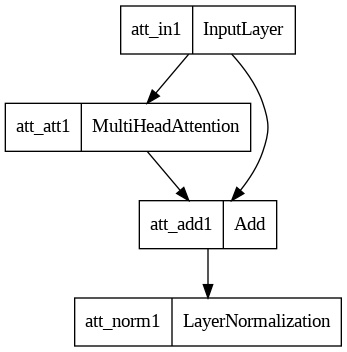

In [31]:
tf.keras.utils.plot_model(model)

**Cross Attention Model**

In [32]:
def cross_attention(input_shape, context_shape,prefix='att', **kwargs ):
  context = tf.keras.layers.Input(shape = context_shape, dtype ='float32', name =f"{prefix}_ctx")
  inputs = tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_in2")
  attention = tf.keras.layers.MultiHeadAttention(name =f"{prefix}_att2", **kwargs)
  norm = tf.keras.layers.LayerNormalization(name =f"{prefix}_norm2")
  add = tf.keras.layers.Add(name =f"{prefix}_add2")
  attout = attention(query = inputs, value = context, key = context)
  output = norm (add([attout, inputs]))
  model = tf.keras.Model(inputs = [(context, inputs)] , outputs = output, name = f"{prefix}_crt_at")
  return model


In [33]:
model = cross_attention(input_shape =(seq_length, key_dim), context_shape =(seq_length, key_dim),num_heads =num_heads,  key_dim = key_dim)

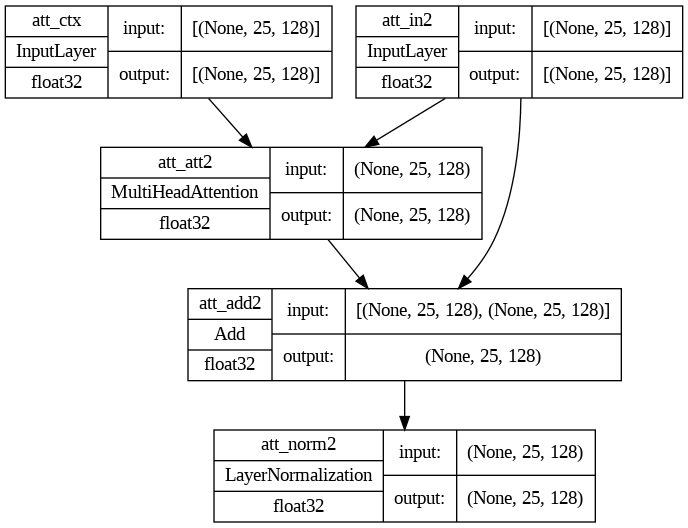

In [34]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

**Feed Forward Model**

In [35]:
def feed_forward(input_shape,model_dim, ff_dim, dropout =.1, prefix='ff' ):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_in3")
  dense1 = tf.keras.layers.Dense(ff_dim, activation = 'relu', name =f"{prefix}_ff1")
  dense2 = tf.keras.layers.Dense(model_dim, activation = 'relu', name =f"{prefix}_ff2")
  drop = tf.keras.layers.Dropout(dropout, name =f"{prefix}_drop")
  add = tf.keras.layers.Add(name =f"{prefix}_add3")
  ffout = drop(dense2(dense1(inputs)))
  norm = tf.keras.layers.LayerNormalization(name =f"{prefix}_norm3")
  output = norm(add([inputs, ffout,]))
  model = tf.keras.Model(inputs = inputs , outputs = output, name = f"{prefix}_ff")
  return model

In [36]:
ff_dim =512
model = feed_forward(input_shape =(seq_length, key_dim),model_dim = key_dim, ff_dim = ff_dim)

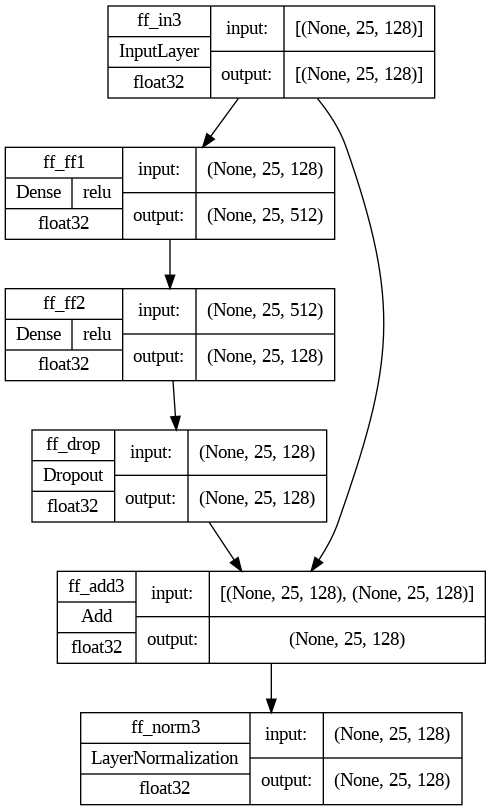

In [37]:
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

# Encoder and Decoder

In [38]:
def encoder (input_shape, key_dim, ff_dim, dropout =.1, prefix ='enc', **kwargs ):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_in0"),
      self_attention (input_shape, prefix =prefix, key_dim=key_dim, mask = False, **kwargs),
      feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = prefix)
  ])
  return model

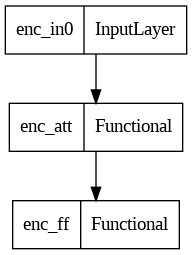

In [39]:
seq_length = 25
key_dim =128
ff_dim =512
num_heads = 8
model = encoder(input_shape =(seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)

In [40]:
def decoder (input_shape, key_dim, ff_dim, dropout =.1, prefix ='dec', **kwargs ):
  inputs = tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_in0")
  context = tf.keras.layers.Input(shape = input_shape, dtype ='float32', name =f"{prefix}_ctx0")
  attmodel = self_attention (input_shape, prefix =prefix, key_dim=key_dim, mask = True, **kwargs)
  crossmodel = cross_attention (input_shape, input_shape, prefix =prefix, key_dim=key_dim, **kwargs)
  ffmodel = feed_forward(input_shape, key_dim, ff_dim, dropout, prefix = prefix)
  x= attmodel(inputs)
  x= crossmodel([context, x])
  output = ffmodel(x)
  model = tf.keras.Model(inputs = [inputs, context], outputs = output, name = prefix)
  return model

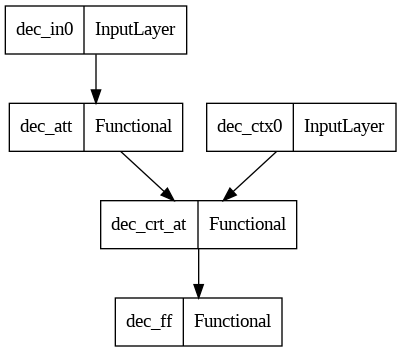

In [41]:
seq_length = 25
key_dim =128
ff_dim =512
num_heads = 8
model = decoder(input_shape =(seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, num_heads = num_heads)
tf.keras.utils.plot_model(model)

# Transformer

Transformer Model Builder
* Inputs:
  * num_layers: Number of encoder and decoder layers.
  * num_heads: Number of attention heads in each multi-head attention layer.
  * seq_length: Length of the input sequences.
  * key_dim: Dimensionality of the key vectors in self-attention and positional embeddings.
  * ff_dim: Dimensionality of the feed-forward networks.
  * vocab_size_en: Vocabulary size of the encoder input (English).
  *vocab_size_fr: Vocabulary size of the decoder output (French).
  *dropout: Dropout rate applied within the encoder and decoder layers (default: 0.1).
* Components:
  * input_enc: Input layer for encoder sequences (encode_inp).
  * input_dec: Input layer for decoder sequences (decode_inp).
  * emb_enc: Positional embedding layer for encoder inputs.
  * emb_dec: Positional embedding layer for decoder inputs.
  * encoders: List of encoder layers with self-attention and feed-forward networks.
  * decoders: List of decoder layers with self-attention, encoder-decoder attention, and feed-forward networks.
  * final: Dense layer for generating final output logits.
* Processing:
  * Apply positional embeddings to encoder and decoder inputs.
  * Iteratively pass encoder inputs through multiple encoder layers.
  *Iteratively pass decoder inputs through multiple decoder layers, incorporating encoder outputs.
  * Compute final output logits using a dense layer.
  *Remove potential masking attributes from the output.

In [42]:
def transformer (num_layers, num_heads,seq_length,key_dim, ff_dim, vocab_size_en, vocab_size_fr ,dropout =.1, name = 'transformer' ):
  input_enc = tf.keras.layers.Input (shape = (seq_length), dtype = 'float32', name = 'encode_inp')
  input_dec = tf.keras.layers.Input (shape = (seq_length), dtype = 'float32', name = 'decode_inp')
  emb_enc = PositionalEmbedding(seq_length,vocab_size_en, key_dim, name ='emb_enc')
  emb_dec = PositionalEmbedding(seq_length,vocab_size_fr, key_dim, name ='emb_dec')
  encoders = [encoder(input_shape =(seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout=dropout,prefix=f'enc{i}', num_heads = num_heads) for i in range(num_layers)]
  decoders = [decoder(input_shape =(seq_length, key_dim), key_dim = key_dim, ff_dim = ff_dim, dropout=dropout,prefix=f'dec{i}', num_heads = num_heads) for i in range(num_layers)]
  final = tf.keras.layers.Dense(vocab_size_fr, name = 'linear')
  x1 = emb_enc(input_enc)
  x2 = emb_dec(input_dec)
  for layer in encoders:
    x1 = layer(x1)
  for layer in decoders:
    x2 = layer([x2, x1])
  output = final(x2)
  try:
    del output._keras_mask
  except:
    pass
  model = tf.keras.Model(inputs = [input_enc, input_dec], outputs = output, name = name)
  return model

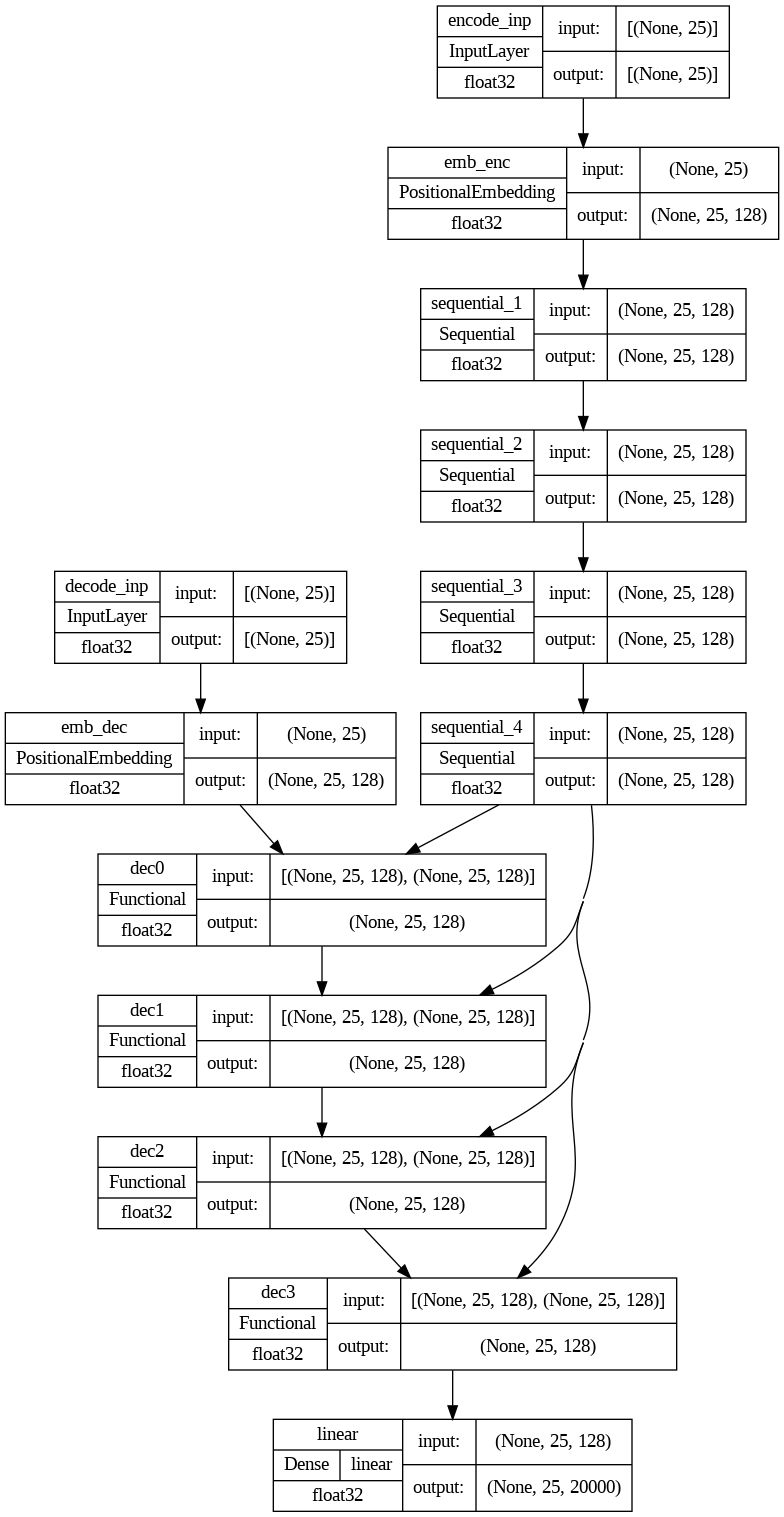

In [43]:
!pip install pydot
seq_length = 25
key_dim = 128
ff_dim =512
num_heads = 8
num_layers = 4
vocab_size_en = 10000
vocab_size_fr = 20000
dropout =.1
model = transformer(num_layers, num_heads, seq_length, key_dim, ff_dim, vocab_size_en, vocab_size_fr, dropout )
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [44]:
class customSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self, key_dim, warmup_steps=4000):
    super().__init__()
    self.key_dim = key_dim
    self.warmup_steps = warmup_steps
    self.d = tf.cast(self.key_dim, tf.float32)
  def __call__(self, step):
    step = tf.cast(step, tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)
    return tf.math.rsqrt(self.d) * tf.math.minimum(arg1, arg2)
  def get_config(self):
    config = {
        'key_dim': self.key_dim,
        'warmup_steps': self.warmup_steps,
    }
    return config
key_dim =128
lr = customSchedule(key_dim)
optimizer = tf.keras.optimizers.Adam(lr, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [45]:
def masked_loss(label, pred):
  mask = label!=0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction= 'none' )
  loss = loss_object(label, pred)
  mask = tf.cast(mask, dtype = loss.dtype)
  loss *= mask
  mask = tf.reduce_sum(loss)/tf.reduce_sum (mask)
  return loss
def mask_accuracy(label, pred):
  pred = tf.math.argmax(pred, axis = 2)
  label = tf.cast(label, pred.dtype)
  match = label == pred
  mask = label != 0
  match = match & mask
  match = tf.cast(match, dtype= tf.float32)
  mask = tf.cast(mask, dtype = tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)


In [46]:
model.compile(optimizer = 'adam', loss = masked_loss, metrics = mask_accuracy)
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encode_inp (InputLayer)     [(None, 25)]                 0         []                            
                                                                                                  
 emb_enc (PositionalEmbeddi  (None, 25, 128)              1280000   ['encode_inp[0][0]']          
 ng)                                                                                              
                                                                                                  
 sequential_1 (Sequential)   (None, 25, 128)              659712    ['emb_enc[0][0]']             
                                                                                                  
 sequential_2 (Sequential)   (None, 25, 128)              659712    ['sequential_1[0][0]

In [48]:
history = model.fit(train_ds, epochs = 10, validation_data = test_ds)

Epoch 1/10
1828/1828 [==============================] - 214s 117ms/step - loss: 4.9551 - mask_accuracy: 0.1557 - val_loss: 6.2464 - val_mask_accuracy: 0.0312
Epoch 2/10
1828/1828 [==============================] - 231s 127ms/step - loss: 4.8148 - mask_accuracy: 0.1725 - val_loss: 4.8271 - val_mask_accuracy: 0.1811
Epoch 3/10
1828/1828 [==============================] - 214s 117ms/step - loss: 4.6522 - mask_accuracy: 0.1925 - val_loss: 4.6717 - val_mask_accuracy: 0.2008
Epoch 4/10
1828/1828 [==============================] - 213s 117ms/step - loss: 4.6672 - mask_accuracy: 0.1892 - val_loss: 6.6628 - val_mask_accuracy: 0.0401
Epoch 5/10
1828/1828 [==============================] - 213s 117ms/step - loss: 4.5257 - mask_accuracy: 0.2024 - val_loss: 4.9004 - val_mask_accuracy: 0.1867
Epoch 6/10
1828/1828 [==============================] - 213s 117ms/step - loss: 4.4276 - mask_accuracy: 0.2098 - val_loss: 4.5391 - val_mask_accuracy: 0.2147
Epoch 7/10
1828/1828 [==============================

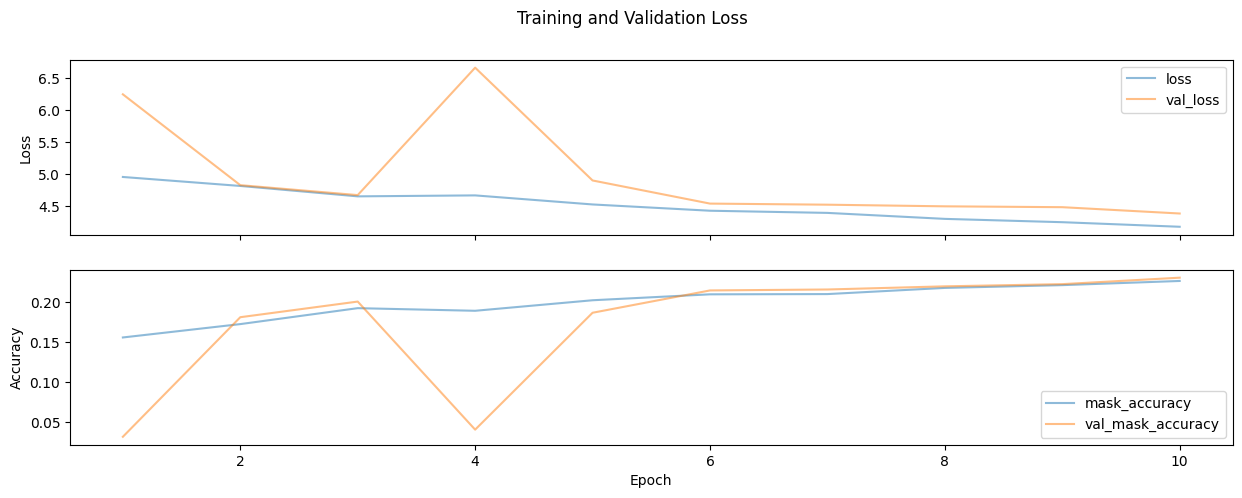

In [51]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, figsize=(15, 5), sharex = True)
fig . suptitle('Training and Validation Loss')
x = list (range(1,11))
axes[0].plot(x, history.history['loss'], alpha = .5, label = 'loss')
axes[0].plot(x, history.history['val_loss'], alpha = .5, label = 'val_loss')
axes[0].set_ylabel('Loss')
axes[0].legend(loc = 'upper right')
axes[1].plot(x, history.history['mask_accuracy'], alpha = .5, label = 'mask_accuracy')
axes[1].plot(x, history.history['val_mask_accuracy'], alpha = .5, label = 'val_mask_accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc = 'lower right')
plt.show()

In [54]:
def translate(sentence):
  enc_tokens = eng_vect([sentence])
  lookup = list (fre_vect.get_vocabulary())
  start_send, end_send = "[start]","[end]"
  output_sent = [start_send]
  for i in range(seq_length):
    vector = fre_vect([''.join(output_sent)])
    assert vector.shape == (1, seq_length+1)
    dec_tokens = vector[:,:-1]
    assert dec_tokens.shape == (1, seq_length)
    pred = model([enc_tokens, dec_tokens])
    assert pred.shape == (1, seq_length, vocab_size_fr)
    word = lookup[np.argmax(pred[0,i,:])]
    output_sent.append(word)
    if word ==end_send:
      break
  return output_sent


In [55]:
seq_length = 25
vocab_size_en = 10000
vocab_size_fr = 20000
test_count = 20
for i in range (test_count):
  eng_sent, fre_sent = random.choice(test_pairs)
  trans  = translate(eng_sent)
  print(f"test case :{i}")
  print(f"eng: {eng_sent}")
  print(f"trans: {' '.join(trans)}")
  print(f"fre: {fre_sent}")


test case :0
eng: this room is empty .
trans: [start] maison .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end]
fre: [start]cette pièce est vide  .[end]
test case :1
eng: bring wine .
trans: [start] un ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end] ![end]
fre: [start]apportez du vin  .[end]
test case :2
eng: i am doing my homework .
trans: [start] suis .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end] .[end]
fre: [start]je suis en train de faire mes devoirs  .[end]
test case :3
eng: why don 't you let me take a look ?
trans: [start] ne ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[end] ?[en